## CS230 Deep Learning  | Baseline Model Inference 

Fall 2019: Sheun Aluko, Surya Narayanan, Vadim Piccini

###  Import Dependencies 

Note: util.py defines several utilities for loading and processing raw data, as well as helper funcionts such as the IOU accuracy metric 


In [90]:
# conventional imports 
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation
import matplotlib.pyplot as plt
keras = tf.keras

#custom imports 
import util as u
import ml_helpers as ml 
import ml_inference_helpers as inference 
import reloader  

# The reloader object allows reloading of source code after modifications are made 
r = reloader.Reloader(["util","ml_helpers","ml_inference_helpers"]) 
r.reload() 

# config 
plt.rcParams["figure.figsize"] = (20,10)
u.reload() 

Reloaded: util
Reloaded: ml_helpers
Reloaded: ml_inference_helpers


In [ ]:
# Load the data 
x_train,y_train,x_val,y_val,x_test,y_test = u.data_load(f=0.1)

In [ ]:
# list models 
import os 
os.listdir("models/")

In [ ]:
# pick model  
m = "v0_t99_e1500_b8_lr0.0003"
model, m_info = inference.load_model(m) 
# summarize it 
model.summary()
# and print loss curve  
ml.train_curve(m_info) 

In [19]:
x_train.shape

(198, 512, 512, 3)

In [45]:
# predict on first 10 training images 
xs, ys = x_train[0:10] , y_train[0:10] 
pred = model.predict(xs) 

# val images
xs_val, ys_val = x_val[0:10] , y_val[0:10] 
pred_val = model.predict(xs)

In [46]:
pred_val.shape

(10, 4)

In [57]:
def calc_iou(y,yp): 
    y = np.array(y,ndmin=2)
    yp = np.array(yp, ndmin=2)
    return ml.calculate_iou(y,yp) 

def calc_iou_vector(ys,yps) : 
    assert len(ys) == len(yps)  
    result = [] 
    for i in range(len(ys))  : 
        result.append(calc_iou(ys[i],yps[i])) 
    
    return np.array(result) 

def calc_diff_vector(ys,yps) : 
    assert len(ys) == len(yps)  
    result = [] 
    for i in range(len(ys))  : 
        result.append(calc_iou(ys[i],yps[i])) 
    
    return np.array(result) 
    
    

In [100]:
np.sum(ys-pred,axis=1)

array([-0.0051429 , -0.00437257, -0.0093628 , -0.00656728, -0.00657049,
       -0.00827023, -0.00105225, -0.0028955 , -0.00204879, -0.00185944])

In [101]:
model.evaluate(x=xs,y=ys)

10/10 [==============================] - 0s 32ms/sample - loss: 2.2413e-06 - IoU: 0.0918


[2.2413230453821598e-06, 0.09184468]

In [59]:
r = calc_iou_vector(ys,pred) 
np.mean(r)

0.8968625

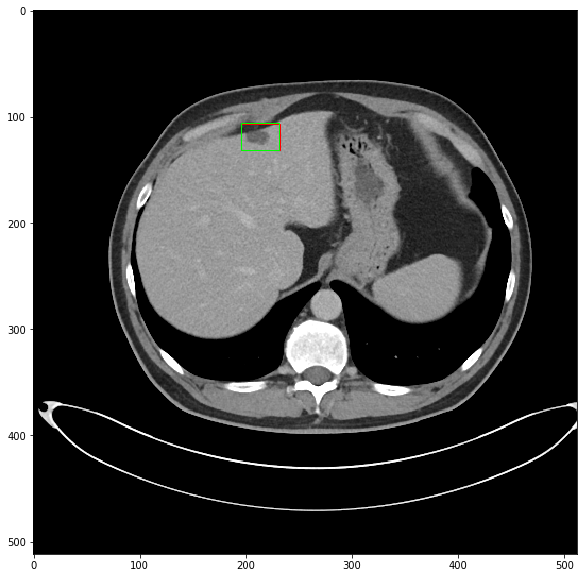

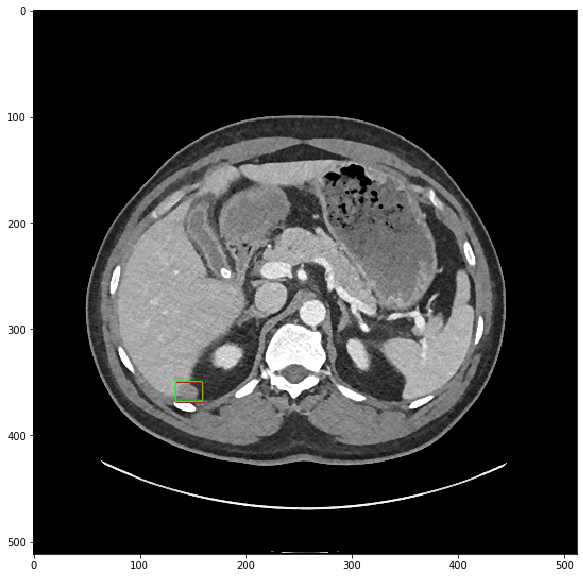

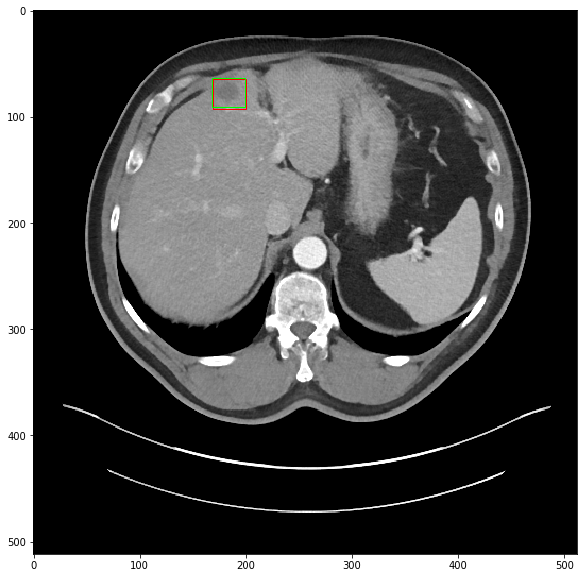

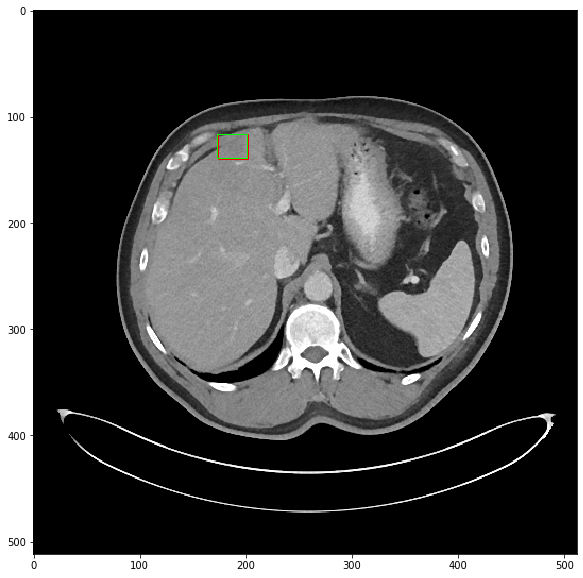

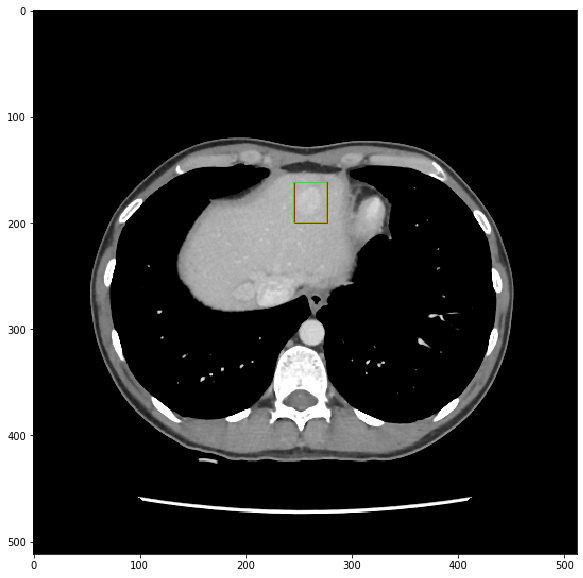

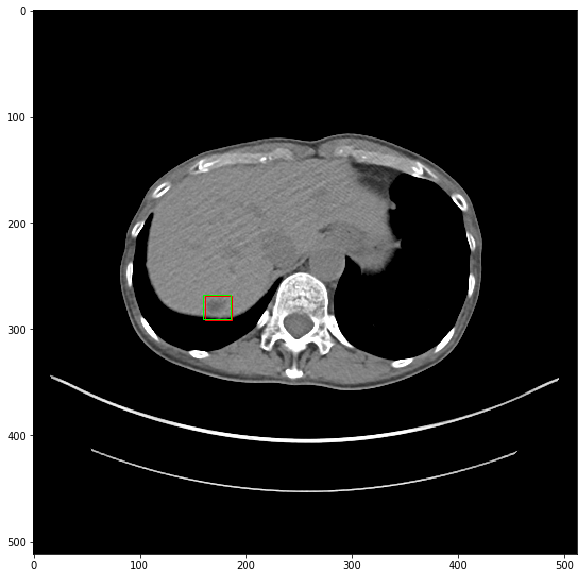

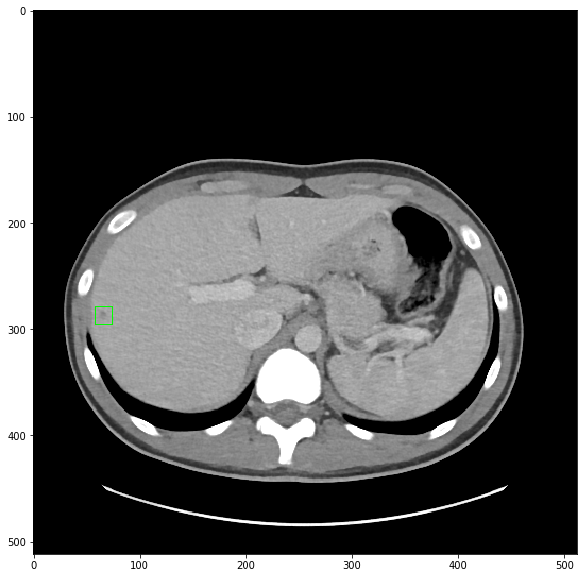

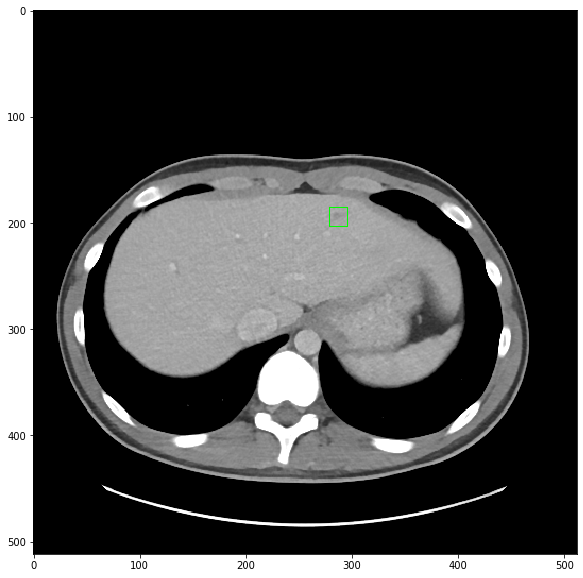

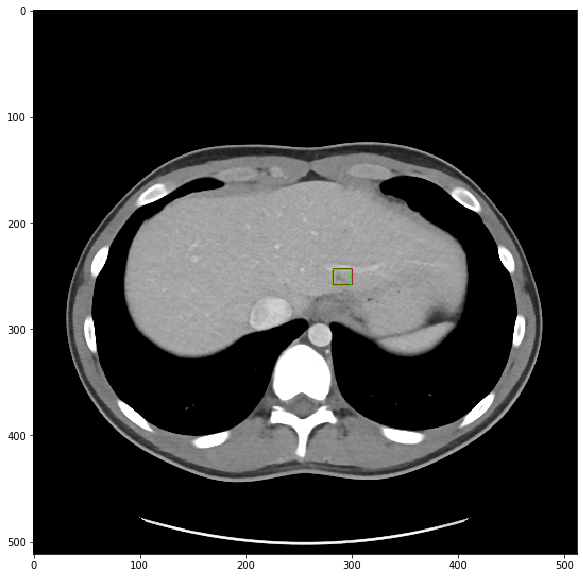

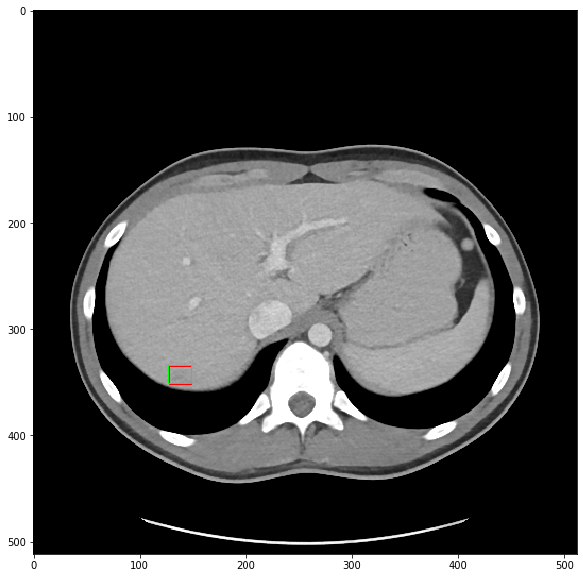

In [91]:
inference.nb_visualize_preds(xs,ys,pred)

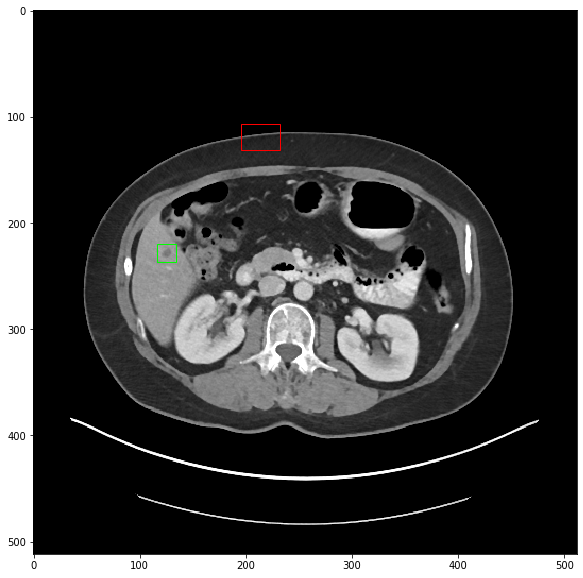

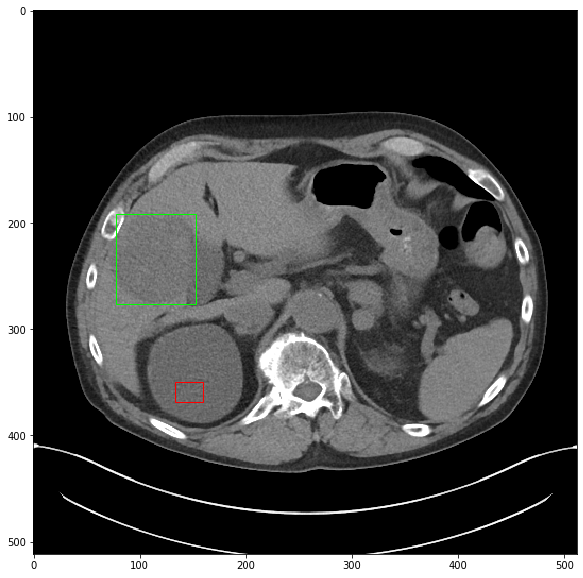

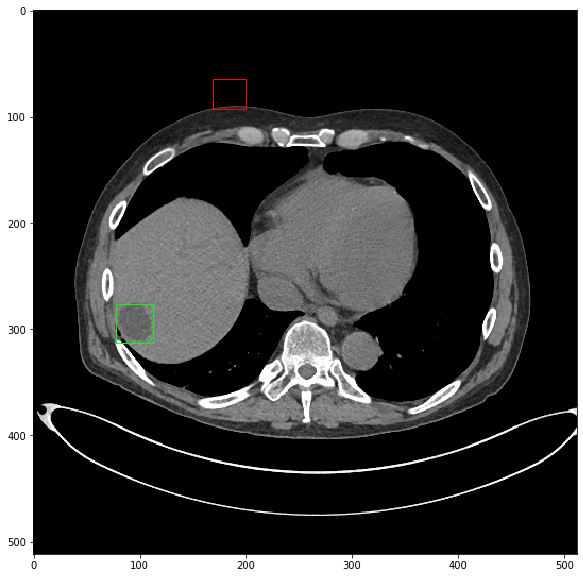

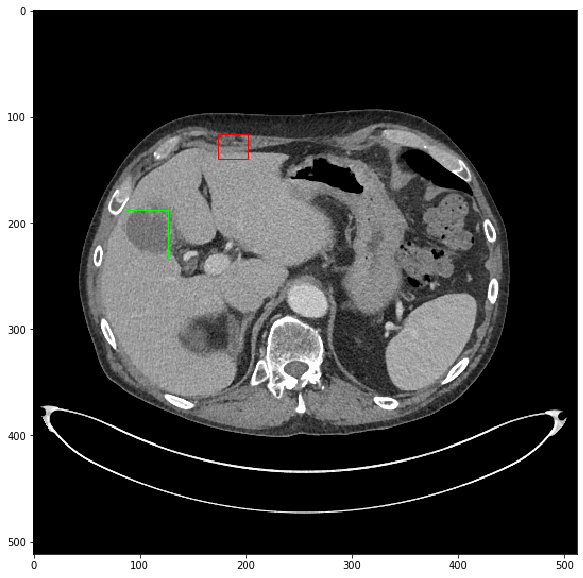

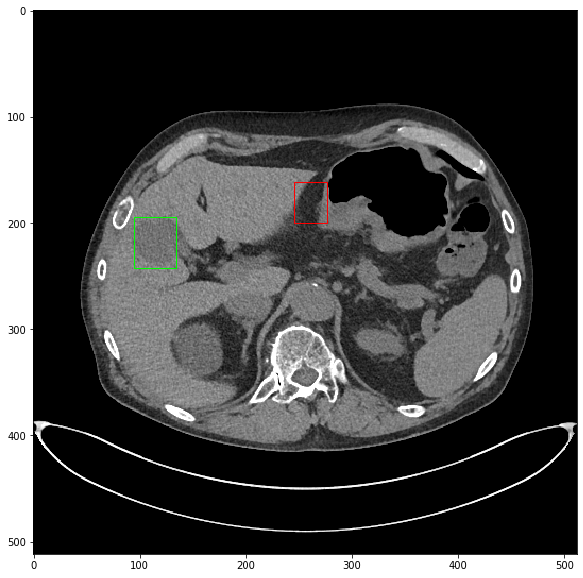

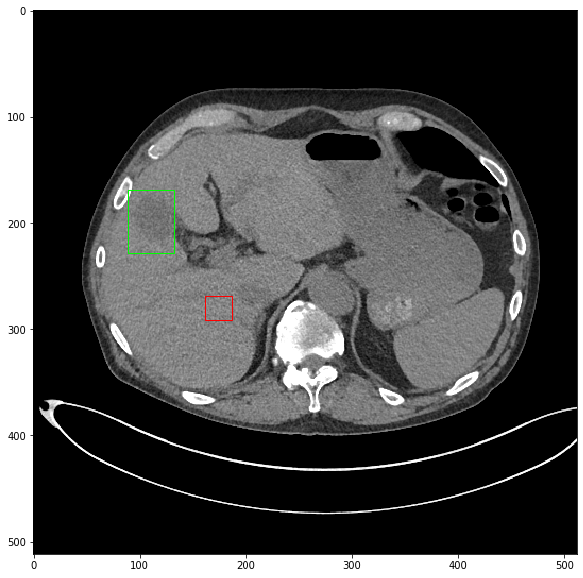

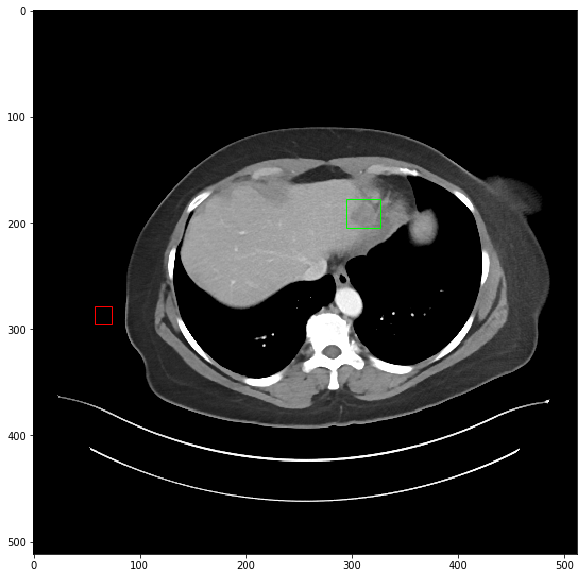

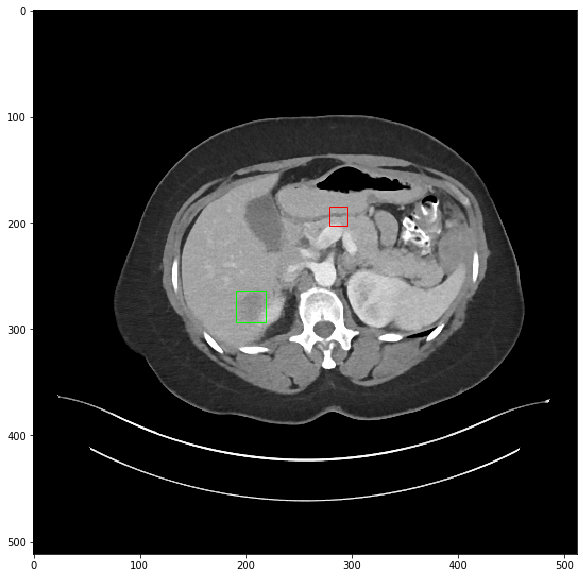

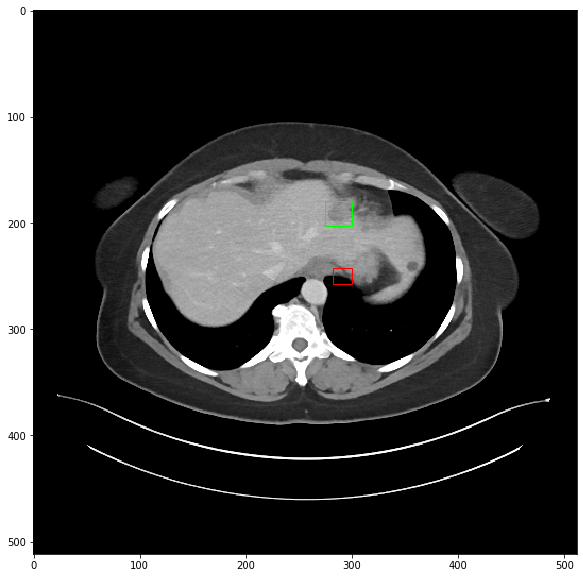

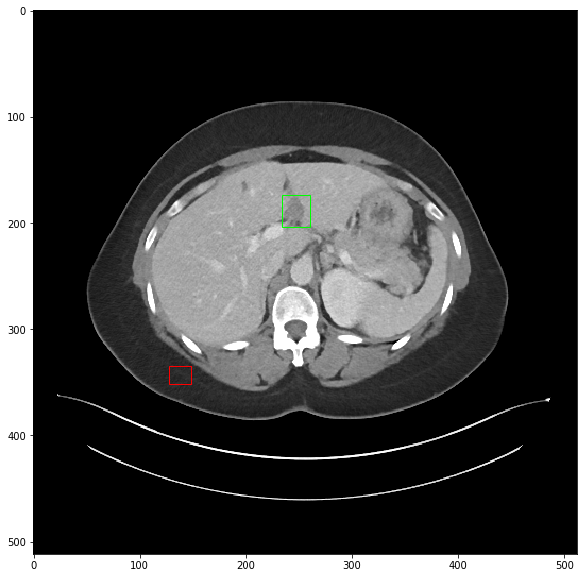

In [92]:
inference.nb_visualize_preds(xs_val,ys_val,pred_val)